# Transfer Learning for MNIST
In this notebook you're going to explore transfer learning techniques in application to MNIST (handwritten digits) dataset.

In [1]:
import numpy as np
import pandas as pd

import keras.backend as K
from keras.datasets import mnist
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.layers.merge import Concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import he_normal
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import model_to_dot

from sklearn.model_selection import train_test_split

from IPython.display import SVG

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


Set style

In [2]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

Just for the sake of reproducibility

In [3]:
np.random.seed(41)

# Data

## MNIST overview

Let's download MNIST dataset. There is a special function in Keras for that purpose (because MNIST is extremely popular)

In [4]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
print(len(X_train), 'train samples')
print(len(X_valid), 'validation samples')

60000 train samples
10000 validation samples


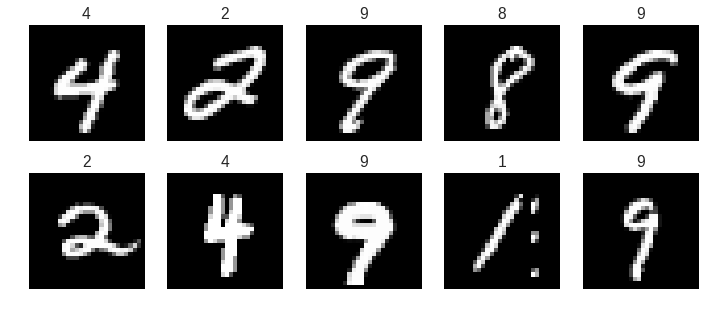

In [5]:
plt.figure(figsize=(12, 5))
for num, i in enumerate(np.random.choice(len(X_train), 10)):
    plt.subplot(2, 5, num + 1)
    plt.imshow(X_train[i], cmap="Greys_r")
    plt.axis("off")
    plt.title(str(y_train[i]))

Let's see objects are distributed among classes

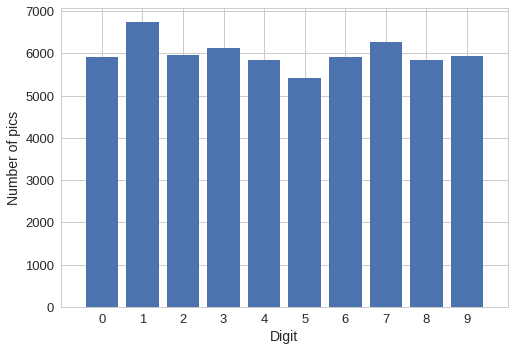

In [6]:
x_bars, y_bars = np.unique(y_train, return_counts=True)
plt.bar(x_bars, y_bars)
plt.xlim([-1, 10])
plt.xticks(np.arange(10))
plt.xlabel("Digit", fontsize=14)
plt.ylabel("Number of pics", fontsize=14)
plt.show()

As one can see, the task is pretty balanced

## Data preparation

First of all, let's predefine image parameters:
* **img_rows, img_cols** $-$ 2D dimension of a pictures; for MNIST it is $28 \times 28$
* **nb_classes** $-$ number of classes (digits in our case)

In [7]:
img_rows, img_cols = 28, 28
nb_classes = 10

Theano and Tensorflow both are tensor-based libraries. It means that all objects inside it, all inputs and outputs are **tensors**. One can treat tensor as a simple multidimensional array.

In [8]:
X_train.shape

(60000, 28, 28)

Here we're going to use dense baseline models so we need to represent our data as 1-dimensional vectors

In [9]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)

Now the vectors are flattened

In [10]:
X_train.shape

(60000, 784)

Tensorflow prefers to work with $\text{float32}$ data type. So the next step is to cast data. Also let's have our data in $[0; 1]$ interval $-$ it's common choice for grayscale images.

In [11]:
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_train /= 255
X_valid /= 255

# Assignment

## Baseline model
* Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ReLU activation function.
* Using Adam optimization and early stopping, try training it on MNIST but only on **digits 0 to 4**, as we will use transfer learning for digits 5 to 9 in the next exercise. You will need a softmax output layer with five neurons. Make sure to save checkpoints at regular intervals and save the final model so you can reuse it later.
* Tune the hyperparameters using cross-validation and see what precision you can achieve.
* Now try adding Batch Normalization and compare the learning curves: is it converging faster than before? Does it produce a better model?
* Is the model overfitting the training set? Try adding dropout to every layer and try again. Does it help?

In [ ]:
#==================================================#
#               Place your code here               #
#==================================================#

## Fine-tuning
* Create a new DNN that reuses all the pretrained hidden layers of the previous model, freezes them, and replaces the softmax output layer with a fresh new one.
* Train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision?
* Try caching the frozen layers, and train the model again: how much faster is it now?
* Try again reusing just four hidden layers instead of five. Can you achieve a higher precision?
* Now unfreeze the top two hidden layers and continue training: can you get the model to perform even better?

In [ ]:
#==================================================#
#               Place your code here               #
#==================================================#

## Siamese networks and transfer learning
* In this exercise you will build a DNN that compares two MNIST digit images and predicts whether they represent the same digit or not. Then you will reuse the lower layers of this network to train an MNIST classifier using very little training data. Start by building two DNNs (let’s call them DNN A and B), both similar to the one you built earlier but without the output layer: each DNN should have five hidden layers of 100 neurons each, He initialization, and ReLU activation. Next, add a single output layer on top of both DNNs. You should use Keras' [merge](https://keras.io/layers/merge/) layer and `Concatenate` mode in particular with `axis=1` to concatenate the outputs of both DNNs along the horizontal axis, then feed the result to the output layer. This output layer should contain a single neuron using the logistic activation function.
* Split (in stratified manner) the MNIST training set in two sets: split №1 should containing 55,000 images, and split №2 should contain contain 5,000 images. Create a function that generates a training batch where each instance is a pair of MNIST images picked from split №1. Half of the training instances should be pairs of images that belong to the same class, while the other half should be images from different classes. For each pair, the training label should be 0 if the images are from the same class, or 1 if they are from different classes.
* Train the DNN on this training set. For each image pair, you can simultaneously feed the first image to DNN A and the second image to DNN B. The whole network will gradually learn to tell whether two images belong to the same class or not.
* Now create a new DNN by reusing and freezing the hidden layers of DNN A and adding a softmax output layer on with 10 neurons. Train this network on split №2 and see if you can achieve high performance despite having only 500 images per class.

In [ ]:
#==================================================#
#               Place your code here               #
#==================================================#